In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

#Importing the Data

In [ ]:
resp = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip")

with ZipFile(BytesIO(resp.read())) as zObject:
    zObject.extract("bank-full.csv")
zObject.close()

resp = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip")

with ZipFile(BytesIO(resp.read())) as zObject:
    zObject.extract("bank-additional/bank-additional-full.csv")
zObject.close()

In [ ]:
df_bank = pd.read_csv('bank-full.csv',sep = ";")
df_bank_add = pd.read_csv('bank-additional/bank-additional-full.csv',sep = ";")

In [ ]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df_bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df_bank.isnull().sum()

NameError: ignored

In [ ]:
df_bank_add.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#EDA

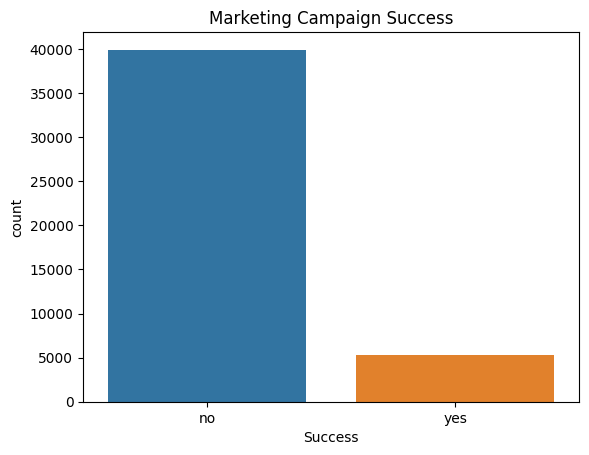

In [ ]:
ax = sns.countplot(x='y',data = df_bank,dodge = False).set(
    xlabel = 'Success',
    title = "Marketing Campaign Success")

plt.show()

In [ ]:
df_bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df_bank_add.loc[df_bank_add['pdays']==999].size

833133

<Axes: xlabel='pdays', ylabel='Count'>

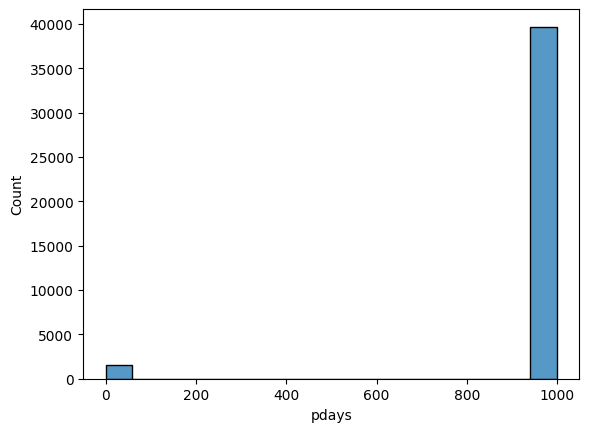

In [ ]:
sns.histplot(data = df_bank_add,x='pdays')

In [ ]:
vdrop = ['pdays','duration']
df_bank=df_bank.drop(columns = vdrop)
df_bank_add=df_bank_add.drop(columns = vdrop)

# EDA

In [ ]:
categorical_columns = ['job','marital','education','default','housing','loan','month',
                       'contact','poutcome']
numerical_columns = ['age','balance','campaign','day','previous']
catcol_add = ['job','marital','education','default','housing','loan','month',
                       'contact','poutcome','day_of_week']
numcol_add = ['age','campaign','previous']
additonal_columns = ['emp.var.rate','cons.price.idx','euribor3m','nr.employed']

In [ ]:
df_bank[numerical_columns].describe().T

NameError: ignored

In [ ]:
df_bank_add[numcol_add].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.0,32.0,38.0,47.0,98.0
campaign,41188.0,2.567593,2.770014,1.0,1.0,2.0,3.0,56.0
previous,41188.0,0.172963,0.494901,0.0,0.0,0.0,0.0,7.0


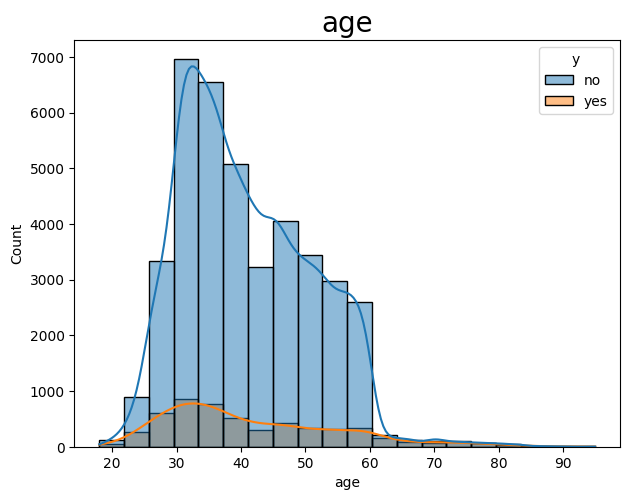

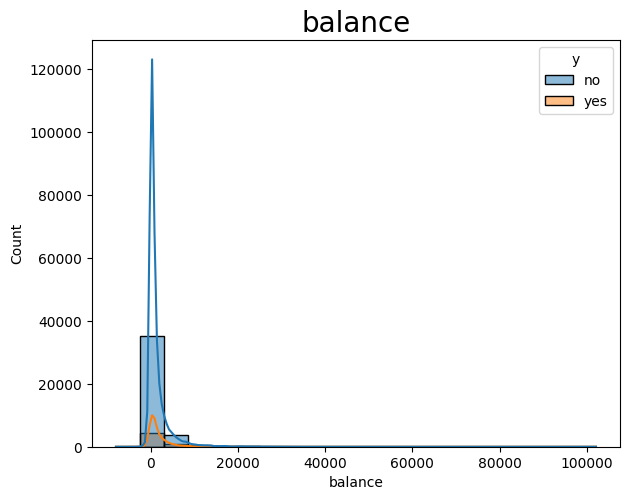

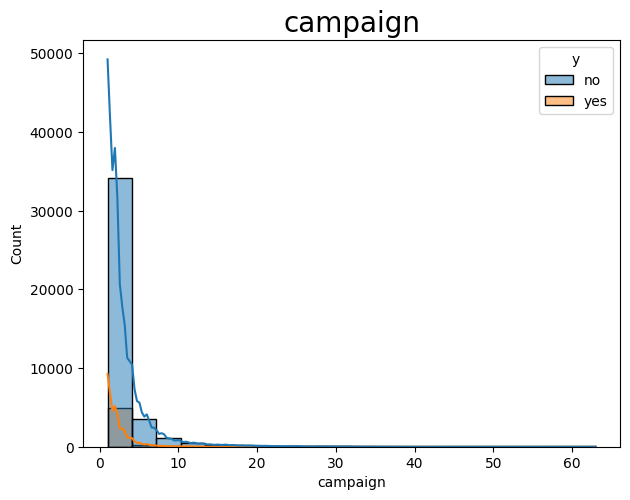

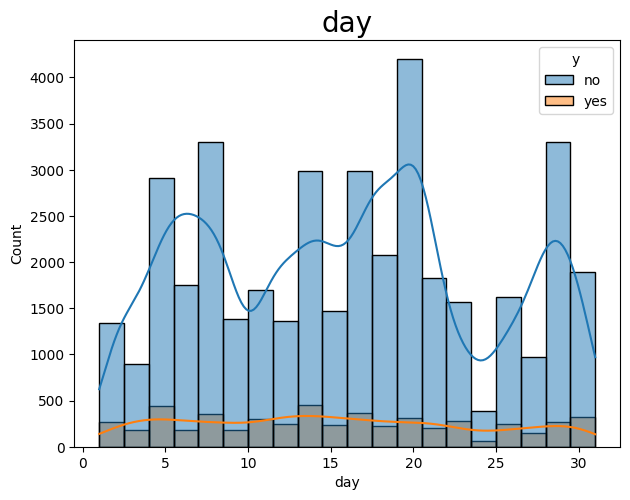

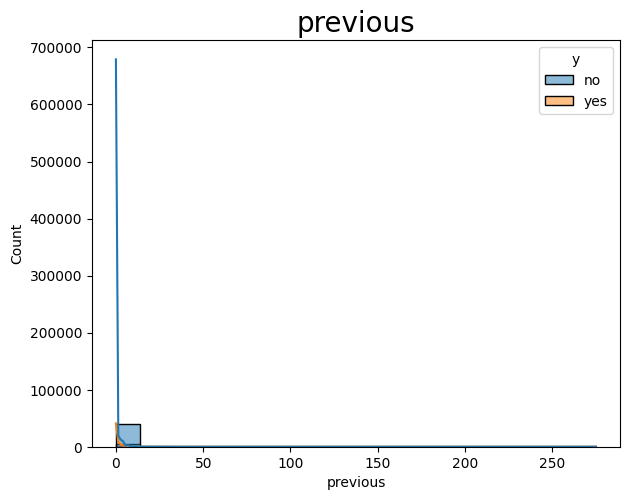

In [ ]:
for var in numerical_columns:
  ax = sns.histplot(data = df_bank, x = var, hue = 'y',bins = 20,
                    kde = True)
  plt.tight_layout()
  plt.title(var, fontsize = 20)
  plt.show()

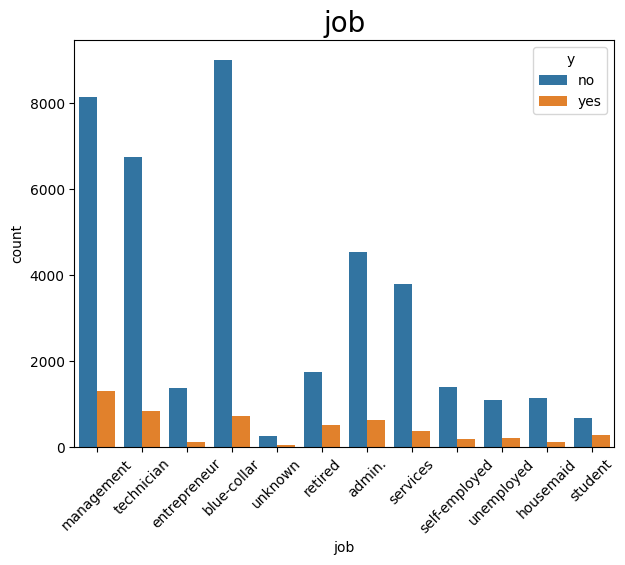

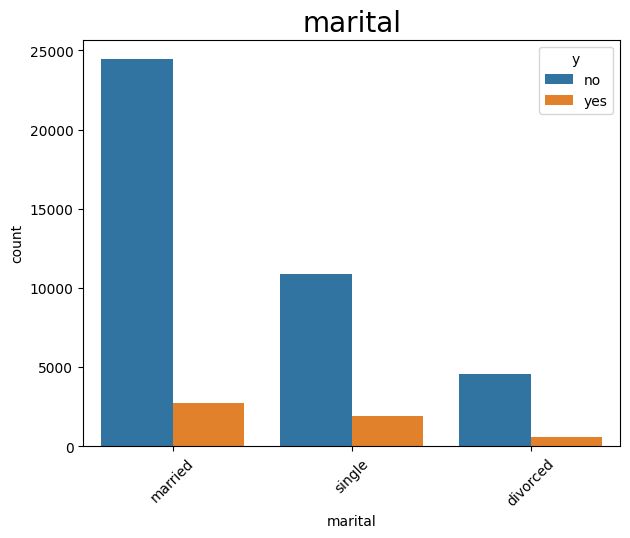

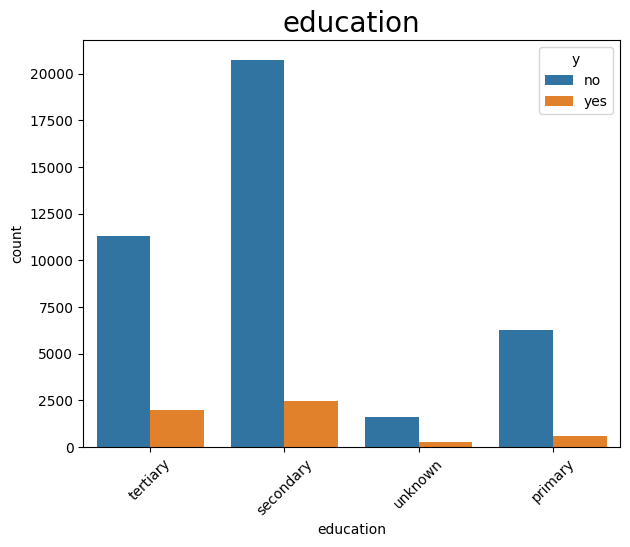

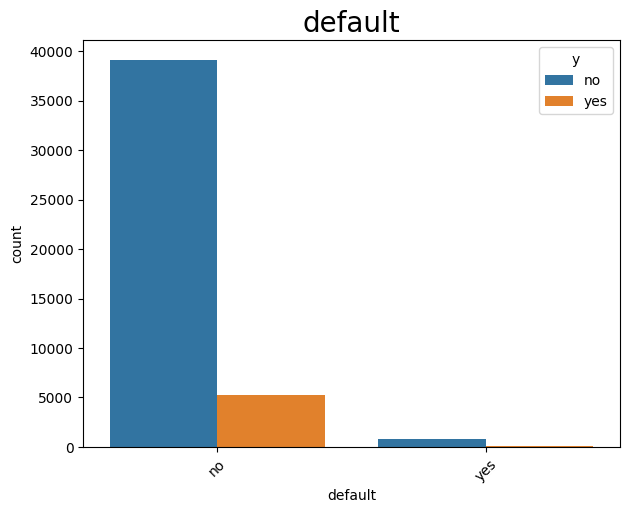

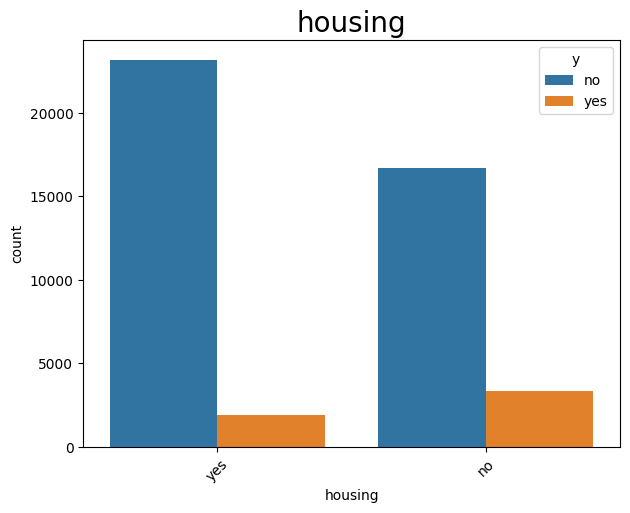

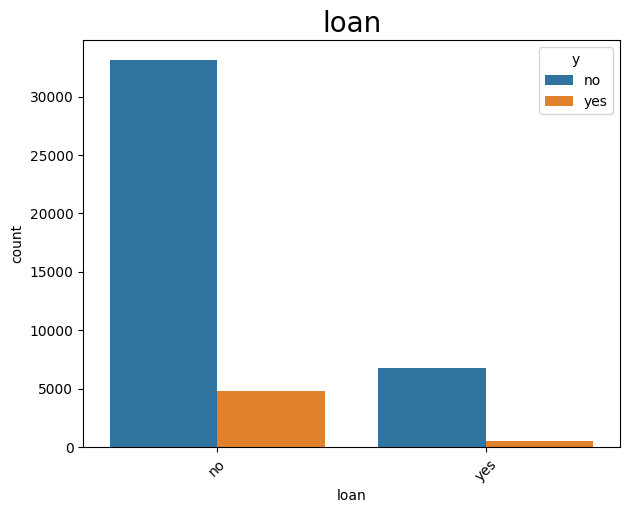

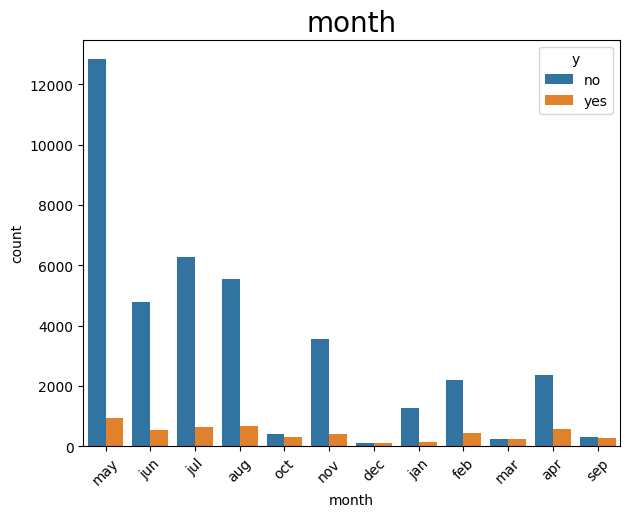

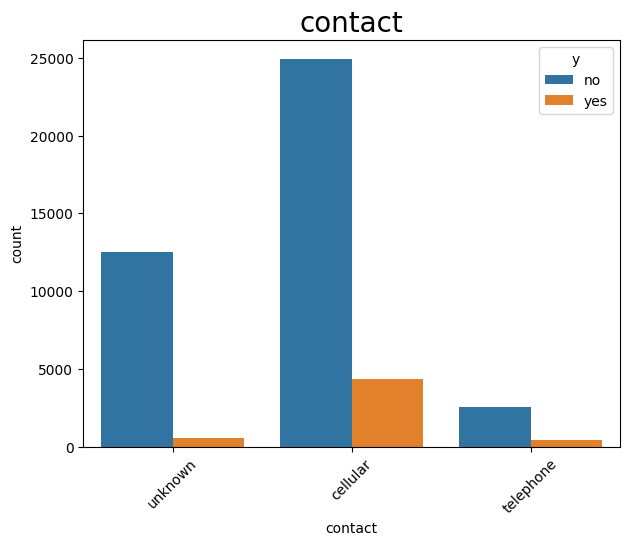

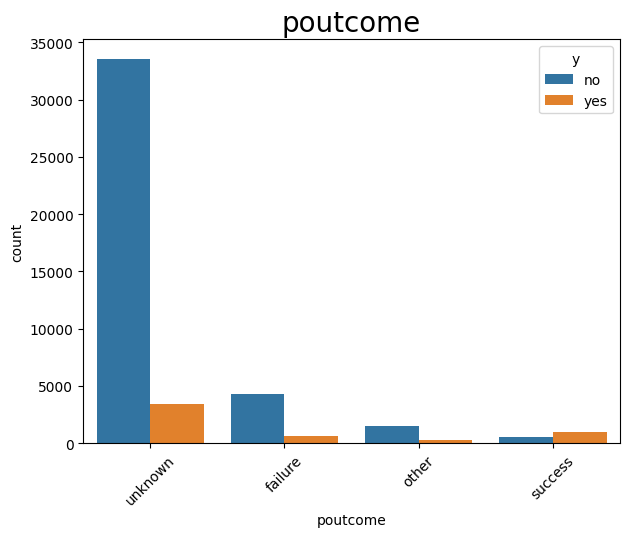

In [ ]:
for var in categorical_columns:
  ax = sns.countplot(data = df_bank, x = var, hue = 'y')
  plt.tight_layout()
  plt.title(var, fontsize = 20)
  plt.xticks(rotation=45)
  plt.show()

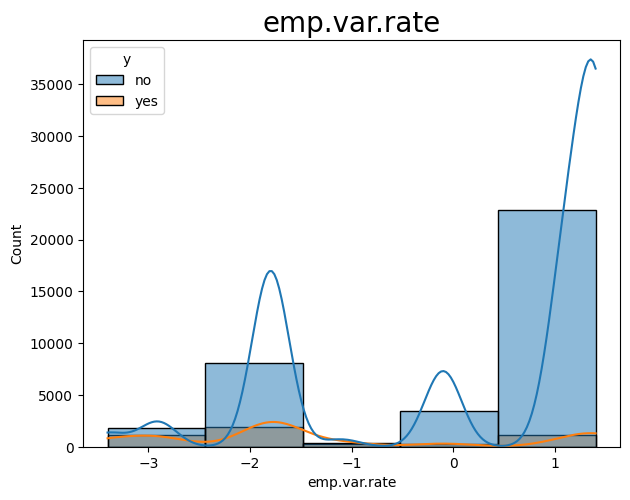

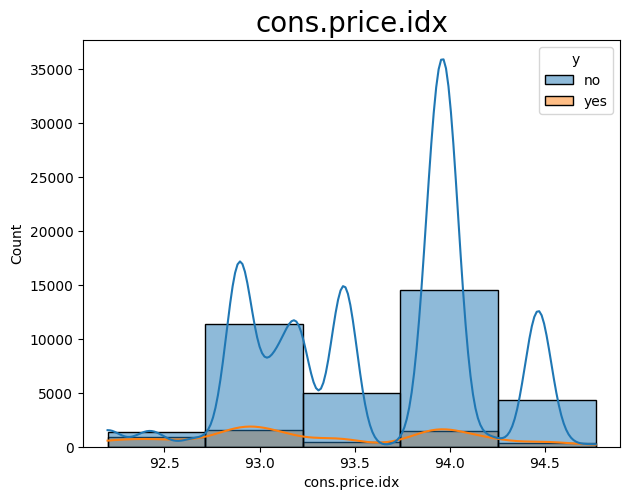

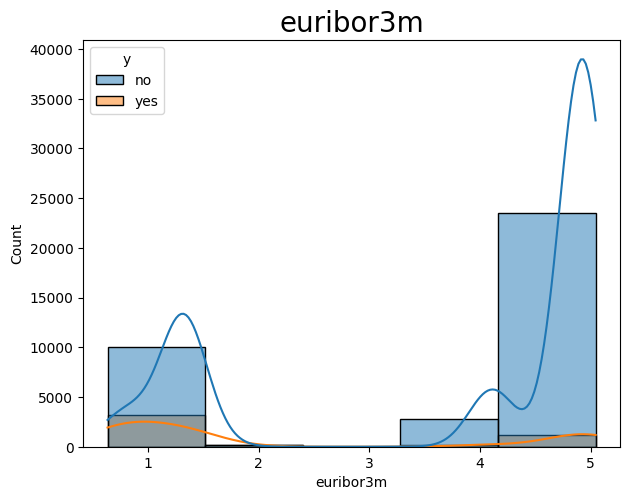

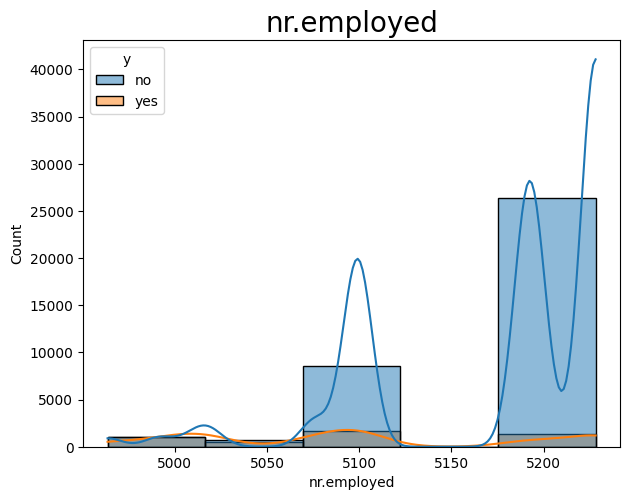

In [ ]:
for var in additonal_columns:
  ax = sns.histplot(data = df_bank_add, x = var, hue = 'y',bins = 5,
                    kde = True)
  plt.tight_layout()
  plt.title(var, fontsize = 20)
  plt.show()

In [ ]:
df_bank[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


<ipython-input-20-bc64356b04e7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_bank_add.corr(),cmap = 'coolwarm',


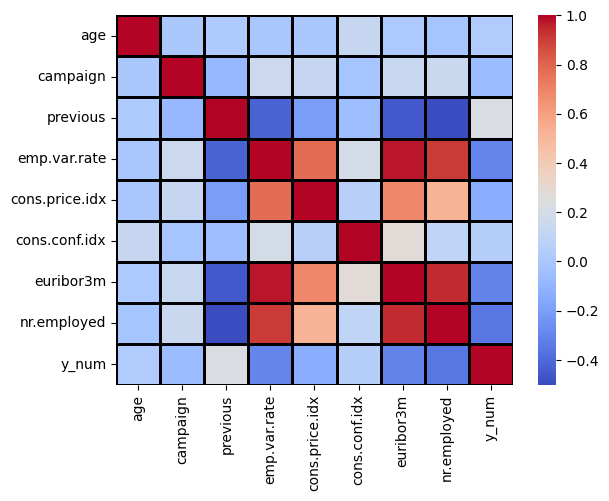

In [ ]:
df_bank_add['y_num'] = df_bank_add['y'].map(dict(yes=1, no=0))

sns.heatmap(df_bank_add.corr(),cmap = 'coolwarm',
            linewidths=1, linecolor='black')
plt.show()

df_bank_add.drop(columns = 'y_num',inplace=True)

#Baseline Models

##Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
X = df_bank.drop(columns = 'y')
y = df_bank['y']
y = y.map(dict(yes=1, no=0))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=1,stratify = y)

X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome
24377,52,blue-collar,married,secondary,no,0,yes,no,cellular,17,nov,1,0,unknown
25707,30,admin.,married,secondary,no,2284,yes,no,cellular,19,nov,1,0,unknown
29303,37,technician,single,tertiary,no,-1,yes,no,cellular,2,feb,2,7,other
44938,47,housemaid,single,tertiary,no,3232,no,no,telephone,6,oct,1,3,failure
1578,41,blue-collar,married,primary,no,-52,yes,no,unknown,8,may,5,0,unknown


##Random Forest Classifier

In [ ]:
categorical_encoder = OneHotEncoder()

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns)
    ]
)

rf = Pipeline(
    [
        ("preprocess", preprocessing),
        ('scaler',StandardScaler(with_mean=False)),
        ("classifier", RandomForestClassifier(
            n_estimators=150,
            max_depth = 25,
            class_weight = 'balanced',
            bootstrap = True,
            min_weight_fraction_leaf = .02,
            n_jobs = -1)),
    ]
)

In [ ]:
rf.fit(X_train, y_train)

print('train accuracy: ',f'{rf.score(X_train, y_train):.3f}')
print('test accuracy: ',f'{rf.score(X_test, y_test):.3f}')

train accuracy:  0.755
test accuracy:  0.761


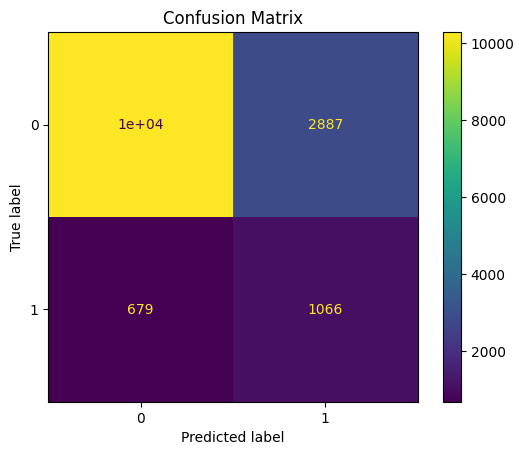

In [ ]:
#Confusion Matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm,display_labels = rf.classes_).plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     13175
           1       0.27      0.61      0.37      1745

    accuracy                           0.76     14920
   macro avg       0.60      0.70      0.61     14920
weighted avg       0.86      0.76      0.80     14920



##Suport Vector Machine

In [ ]:
svm = Pipeline(
    [
        ("preprocess", preprocessing),
        #('scaler',StandardScaler(with_mean=False)),
        ("classifier", SVC(class_weight = 'balanced'))
    ]
)

In [ ]:
svm.fit(X_train, y_train)

print('train accuracy: ',f'{svm.score(X_train, y_train):.3f}')
print('test accuracy: ',f'{svm.score(X_test, y_test):.3f}')

train accuracy:  0.831
test accuracy:  0.822


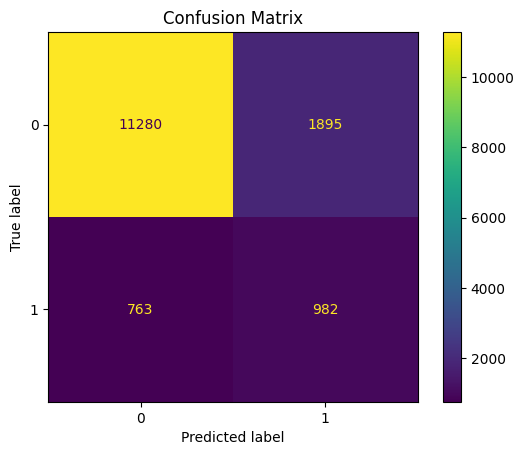

In [ ]:
#Confusion Matrix
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm,display_labels = svm.classes_).plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.89     13175
           1       0.34      0.56      0.42      1745

    accuracy                           0.82     14920
   macro avg       0.64      0.71      0.66     14920
weighted avg       0.87      0.82      0.84     14920



##Sequential Neural Network

In [ ]:
# first neural network with keras tutorial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics

X = pd.get_dummies(X_train,columns = categorical_columns)

X = X.values.astype(np.float32)
y = y_train.astype(np.float32)

# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(49,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',metrics.Recall()])
# fit the keras model on the dataset
class_weight = {0: 1, 1: 10}
model.fit(X, y, epochs=10, batch_size=10,class_weight=class_weight)
# evaluate the keras model
accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy[1]*100))

Epoch 1/10
3030/3030 [==============================] - 8s 2ms/step - loss: 2.1615 - accuracy: 0.4884 - recall: 0.6611
Epoch 2/10
3030/3030 [==============================] - 6s 2ms/step - loss: 1.8649 - accuracy: 0.5388 - recall: 0.7243
Epoch 3/10
3030/3030 [==============================] - 7s 2ms/step - loss: 1.6518 - accuracy: 0.5586 - recall: 0.7263
Epoch 4/10
3030/3030 [==============================] - 6s 2ms/step - loss: 1.5430 - accuracy: 0.5464 - recall: 0.7469
Epoch 5/10
3030/3030 [==============================] - 15s 5ms/step - loss: 1.3991 - accuracy: 0.5396 - recall: 0.7712
Epoch 6/10
3030/3030 [==============================] - 7s 2ms/step - loss: 1.3082 - accuracy: 0.5131 - recall: 0.7991
Epoch 7/10
3030/3030 [==============================] - 7s 2ms/step - loss: 1.2552 - accuracy: 0.4759 - recall: 0.8296
Epoch 8/10
3030/3030 [==============================] - 9s 3ms/step - loss: 1.2398 - accuracy: 0.5343 - recall: 0.7999
Epoch 9/10
3030/3030 [=========================

467/467 [==============================] - 1s 2ms/step


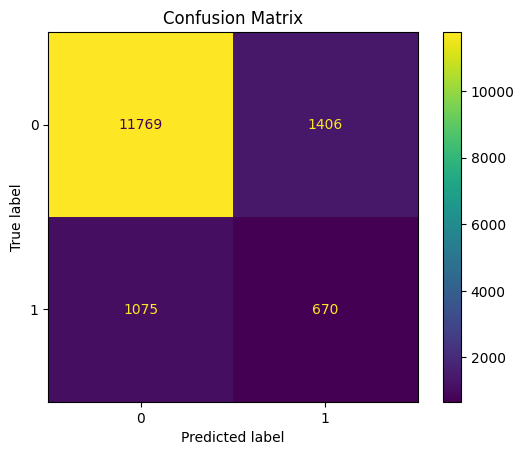

In [ ]:
X_t = pd.get_dummies(X_test,columns = categorical_columns)

y_pred = (model.predict(X_t) > 0.616).astype(int)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm,display_labels = [0,1]).plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     13175
           1       0.32      0.38      0.35      1745

    accuracy                           0.83     14920
   macro avg       0.62      0.64      0.63     14920
weighted avg       0.85      0.83      0.84     14920



#Cross Validation

In [ ]:
#introduce Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

##GridCV RFC

In [ ]:

param_grid = {
    'classifier__min_samples_split': [2, 5],
    'classifier__n_estimators' : [100,200],
    'classifier__max_depth': [25, 50],
    'classifier__max_features': [3, 5]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

skf = StratifiedShuffleSplit(n_splits=3)

rf_cv = Pipeline(
    [
        ("preprocess", preprocessing),
        ('scaler',StandardScaler(with_mean=False)),
        ("classifier", RandomForestClassifier(
            class_weight = 'balanced',
            bootstrap = True,
            n_jobs = 1)),

    ]
)

GridCV = GridSearchCV(rf_cv,param_grid, scoring=scorers, refit='recall_score',
                           cv=skf, return_train_score=True, n_jobs=1)


In [ ]:
GridCV.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % GridCV.best_score_)
print(GridCV.best_params_)

Best parameter (CV score=0.475):
{'classifier__max_depth': 25, 'classifier__max_features': 3, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


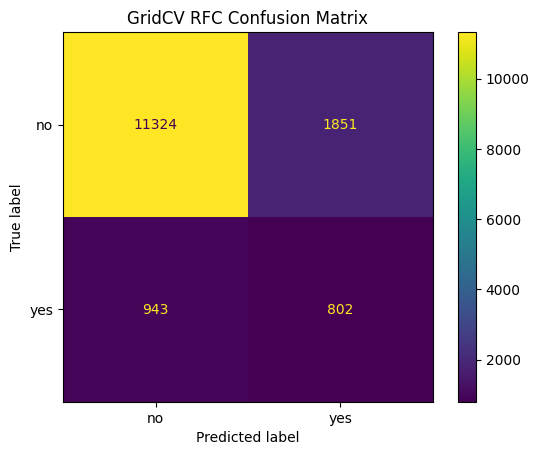

In [ ]:
#Confusion Matrix
y_pred = GridCV.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm,display_labels = ['no','yes']).plot()
plt.title("GridCV RFC Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     13175
           1       0.30      0.46      0.36      1745

    accuracy                           0.81     14920
   macro avg       0.61      0.66      0.63     14920
weighted avg       0.85      0.81      0.83     14920



##GridCV SVM

In [ ]:
#Run GridCV on SVC
param_grid = {
    'classifier__kernel':('sigmoid', 'rbf'),
    'classifier__C' : [.5,1,2]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

sss = StratifiedShuffleSplit(n_splits=5,test_size=0.2)

svm_cv = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", SVC(
            class_weight = 'balanced',
            gamma = 'auto')),

    ]
)

GridCV_svm = GridSearchCV(svm_cv,param_grid, scoring=scorers, refit='recall_score',
                           cv=sss, return_train_score=True, n_jobs=1)

In [ ]:
GridCV_svm.fit(X_train, y_train)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.2,
            train_size=None),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'month',
                                                                          'contact',
                                                                          'poutcome'])])),
                                       ('classifier',
                                        SVC(class_weight='balanced',
                                            gamma='auto'))]),
             n_jobs=1,
             param_grid={'classifier__C': [0.5, 1, 2],
                         'classifier__kernel': ('sigmoid', 'rbf')},
             refit='recall_score', return_train_score=True,
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [ ]:
print("Best parameter (CV score=%0.3f):" % GridCV_svm.best_score_)
print(GridCV_svm.best_params_)

Best parameter (CV score=0.575):
{'classifier__C': 2, 'classifier__kernel': 'sigmoid'}


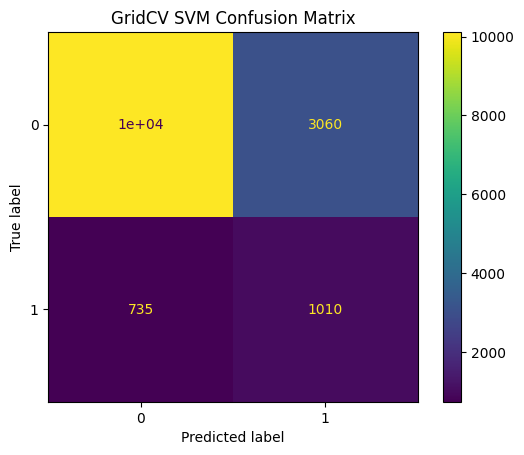

In [ ]:
#Confusion Matrix
y_pred = GridCV_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm,display_labels = GridCV_svm.classes_).plot()
plt.title("GridCV SVM Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84     13175
           1       0.25      0.58      0.35      1745

    accuracy                           0.75     14920
   macro avg       0.59      0.67      0.59     14920
weighted avg       0.85      0.75      0.78     14920



#Truncated SVD

##Build and Test Baseline

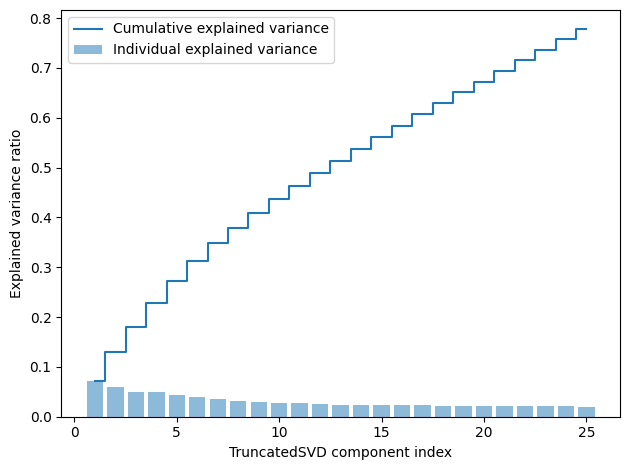

In [ ]:
#SVD
X_enc = pd.get_dummies(X,columns = categorical_columns)

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

#Standardize and scale the data
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_enc)

#compress sparse matrix
X_sparse = csr_matrix(X_scale)

#split the dataset
X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

#Run SVD
tsvd = TruncatedSVD(n_components=25)
df_tsvd = tsvd.fit(X_train_svd, y = y_train_svd)

exp_var_tvsd = tsvd.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_tvsd)

plt.bar(range(1,len(exp_var_tvsd)+1), exp_var_tvsd, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('TruncatedSVD component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
best_rf = RandomForestClassifier(
            n_estimators=100,
            max_depth = 25,
            class_weight = 'balanced',
            bootstrap = True,
            min_samples_split = 5,
            max_features = 3,
            n_jobs = -1)

best_rf.fit(X_train_svd, y_train_svd)

print('train accuracy: ',f'{best_rf.score(X_train_svd, y_train_svd):.3f}')
print('test accuracy: ',f'{best_rf.score(X_test_svd, y_test_svd):.3f}')

train accuracy:  0.971
test accuracy:  0.882


In [ ]:
rf_best_pre = Pipeline(
    [
        ("preprocess", preprocessing),
        ('scaler',StandardScaler(with_mean=False)),
        ("classifier", RandomForestClassifier(
            n_estimators=100,
            max_depth = 25,
            class_weight = 'balanced',
            bootstrap = True,
            min_samples_split = 5,
            max_features = 3,
            n_jobs = -1)),
    ]
)

##Create Precision Recall Curve
ROC curve code included as well

In [ ]:
#ROC Curve
from plotnine import *

cv_obj = StratifiedShuffleSplit(n_splits=10,test_size=0.2)


def get_roc_data(model, cv_obj,X,y):
    curve_df = None
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for i, (train, test) in enumerate(cv_obj.split(X, y)):
        model.fit(X.loc[train], y[train])
        scores = model.predict_proba(X.loc[test])[:,1]
        fpr, tpr, _ = roc_curve(y[test],scores)

        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tmp = pd.DataFrame({'fold':i, 'fpr': mean_fpr, 'tpr': interp_tpr})
        curve_df = tmp if curve_df is None else pd.concat([curve_df, tmp])

        aucs.append(auc(fpr, tpr))

    curve_df = curve_df.groupby('fpr').agg({'tpr': 'mean'}).reset_index()
    curve_df.iloc[-1,1] = 1.0

    auc_df = pd.DataFrame({'fold': np.arange(len(aucs)), 'auc': aucs})
    return curve_df, auc_df


In [ ]:
cv_obj = StratifiedShuffleSplit(n_splits=10,test_size=0.2)

#Precision Recall Curve
def get_prc_data(model, cv_obj,X,y):
    curve_df = None
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for i, (train, test) in enumerate(cv_obj.split(X, y)):
        model.fit(X.loc[train], y[train])
        scores = model.predict_proba(X.loc[test])[:,1]
        fpr, tpr, _ = precision_recall_curve(y[test],scores)

        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tmp = pd.DataFrame({'fold':i, 'prec': mean_fpr, 'rec': interp_tpr})
        curve_df = tmp if curve_df is None else pd.concat([curve_df, tmp])

        aucs.append(auc(tpr, fpr))

    curve_df = curve_df.groupby('prec').agg({'rec': 'mean'}).reset_index()
    curve_df.iloc[-1,1] = 1.0

    auc_df = pd.DataFrame({'fold': np.arange(len(aucs)), 'auc': aucs})
    return curve_df, auc_df

In [ ]:
#Get ROC curve for baseline model
X = X.set_index(pd.Index(list(range(0,len(X)))))
base_curve_df, base_auc_df = get_prc_data(rf_best_pre, cv_obj,X,y)
base_curve_df['model'] = 'base rf'
base_auc_df['model'] = 'base rf'

In [ ]:
# Get ROC curve data for SVD model
model_tsvd = tsvd.fit_transform(X_sparse, y)
df_tsvd = pd.DataFrame(model_tsvd)
df_tsvd.columns = df_tsvd.columns.astype(str)

X_tsvd = df_tsvd
tsvd_curve_df, tsvd_auc_df = get_prc_data(best_rf, cv_obj,X_tsvd,y)
tsvd_curve_df['model'] = 'rf tsvd'
tsvd_auc_df['model'] = 'rf tsvd'

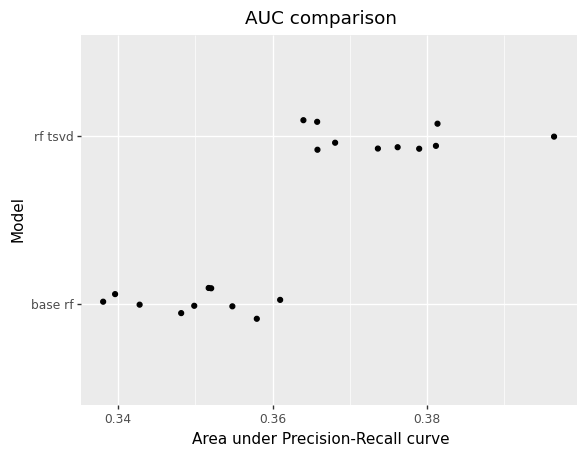

<ggplot: (8774722051079)>

In [ ]:
# Plot the distribution of auc estimates
curve_df = pd.concat([base_curve_df, tsvd_curve_df])
auc_df = pd.concat([base_auc_df, tsvd_auc_df])

(ggplot(auc_df, aes(x='model', y='auc')) +
     geom_jitter(position=position_jitter(0.1)) +
     coord_flip() +
     labs(title = "AUC comparison",
          x="Model",
          y="Area under Precision-Recall curve"))

In [ ]:
# Use a two-sided test (based on linear regression) to see if there is a
# statistically significant difference in auc estimates
import statsmodels.formula.api as smf
lm_fit = smf.ols('auc~model', data=auc_df).fit()

In [ ]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    auc   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     41.55
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           4.58e-06
Time:                        20:03:08   Log-Likelihood:                 67.184
No. Observations:                  20   AIC:                            -130.4
Df Residuals:                      18   BIC:                            -128.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3496      0.003    124.678      0.000       0.344       0.355
model[T.rf tsvd]     0.0256      0.004      6.446      0.000       0.017       0.034
==============================================================================
Omnibus:                        1.592   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                0.903
Skew:                           0.520   Prob(JB):                        0.637
Kurtosis:                       2.948   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#run for ROC
mean_curve_df = curve_df.groupby(['model','fpr']).agg({'tpr': 'mean'}).reset_index()
(ggplot(mean_curve_df, aes(x='fpr', y='tpr', color='model')) +
    geom_line() +
 geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1))+
    labs(title = "ROC curves",
         x = "False positive rate",
         y = "True positive rate"))

KeyError: ignored

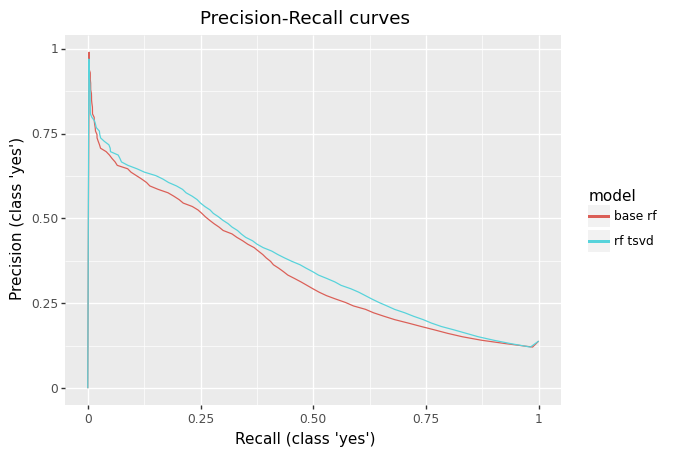

<ggplot: (8774722071655)>

In [ ]:
#run for Prec-Rec
mean_curve_df = curve_df.groupby(['model','rec']).agg({'prec': 'mean'}).reset_index()
(ggplot(mean_curve_df, aes(x='rec', y='prec', color='model')) +
    geom_line() +
    labs(title = "Precision-Recall curves",
         x = "Recall (class 'yes')",
         y = "Precision (class 'yes')"))